Consider the extended nonlinear stochastic Stommel model given by the equations
\begin{align}
dY_t &= (\bar{F}- Y_t(1 + \mu(1- Y_t)^2))dt + \bar{F}dZ_t \\
dZ_t & = g'(t)dt + \sigma dW_t; 
\end{align}
where g(t) describes a time-dependence of the freshwater forcing, with $Y_0 = 0.1$ and $Z_0 = 0$.

(ii) Write a Python program to integrate the system of SDEs using the Euler-Maruyama (EM) scheme. Determine a solution of the equations for $F = 1.1$, $\sigma = 0.1$, $\mu = 6.2$ and $g(t) = 0$. Make a plot of the probability density function for this case.

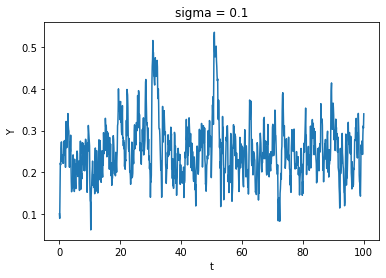

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

r_seed = 100

F = 1.1; sigma = 0.1; mu = 6.2

gd = 0

T = 100; N=1000; dt = T/N

def euler_maruyama(n,delta_t,f,g_der,mu,sigma,rnd_seed):
    np.random.seed(rnd_seed) 
    X = np.zeros(n+1); X[0] = 0.1

    for j in range(1,n+1):
        dW = np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
        X[j] = X[j-1] + (f*(1+g_der) - X[j-1]*(1+mu*(1-X[j-1])**2))*delta_t + f*sigma*dW
        
    return X

Y = euler_maruyama(N,dt,F,gd,mu,sigma,r_seed)
    
    
t = np.arange(0,T+dt,dt)
plt.plot(t, Y)
plt.title("sigma = {}".format(sigma))
plt.xlabel('t'); plt.ylabel('Y')
plt.show()
plt.figure()
    


Plot the histogram

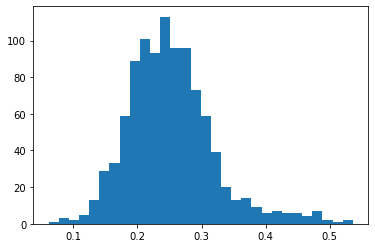

In [32]:
plt.hist(Y, bins=30);

(iv) Next, consider the stochastic case with $g(t) = \epsilon t$ and $\epsilon = 0.001$. Study the behavior
of the model for increasing noise amplitude (again with $F = 1.1$ and $\mu = 6.2$). What
type of tipping occurs when $\sigma$ increases?

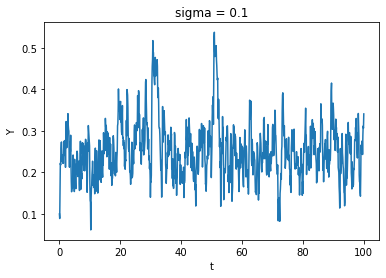

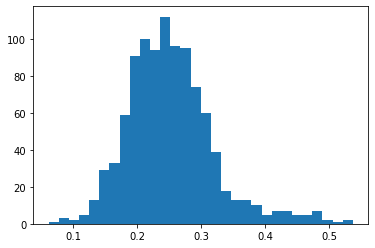

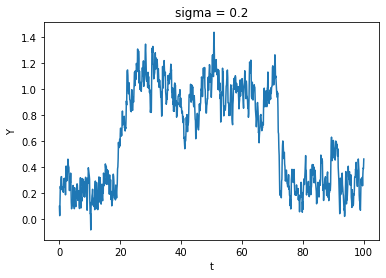

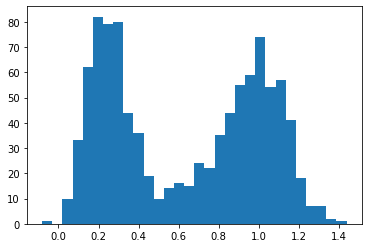

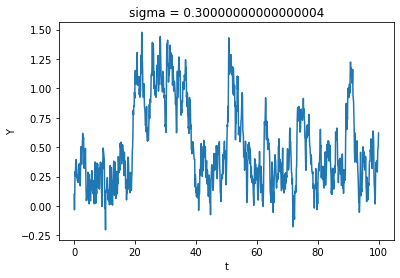

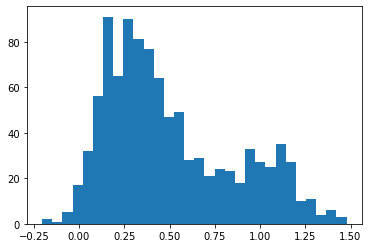

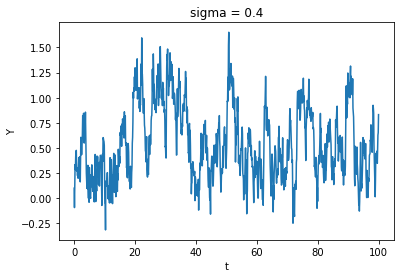

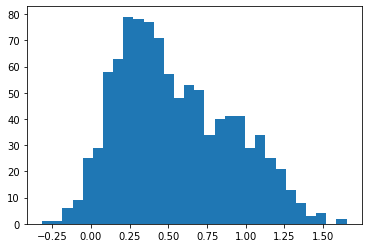

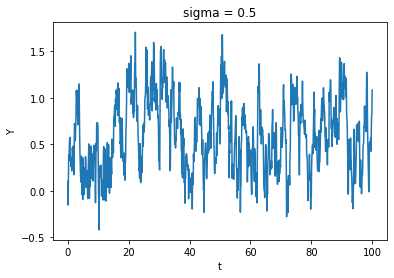

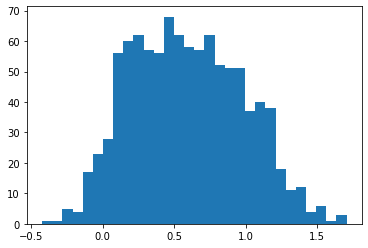

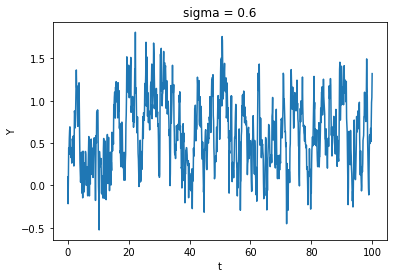

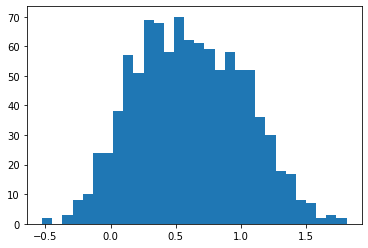

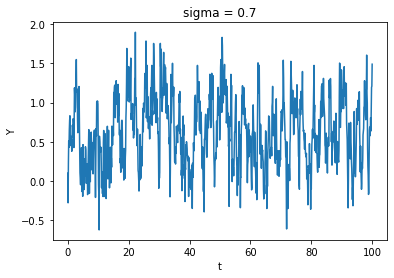

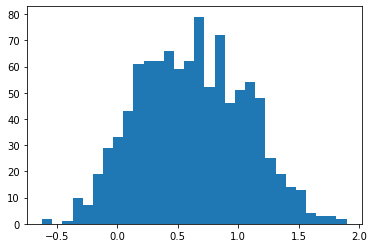

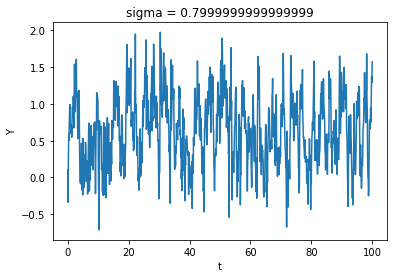

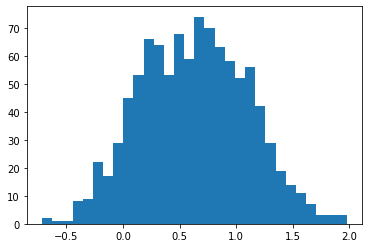

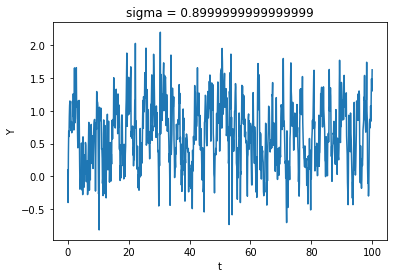

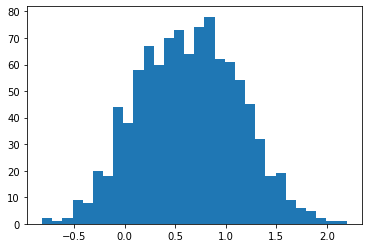

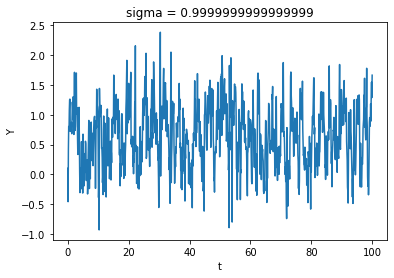

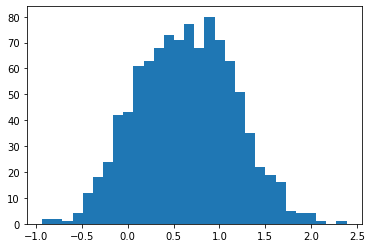

<Figure size 432x288 with 0 Axes>

In [35]:
gd = 0.001
sigma = 0.1

while sigma < 1: 
    
    Y = euler_maruyama(N,dt,F,gd,mu,sigma,r_seed)
    
    plt.plot(t, Y)
    plt.title("sigma = {}".format(sigma))
    plt.xlabel('t'); plt.ylabel('Y')
    plt.show()
    plt.figure()
    plt.hist(Y, bins=30);
    plt.show()
    plt.figure()
    
    sigma+=0.1